Divided the dataset into 2 columns - attributes,performance_metrics


---



In [ ]:
import pandas as pd

# Loading the dataset
file_path = 'Training dataset.csv'
data = pd.read_csv(file_path)

# Dividing the dataset into attributes and performance_metrics
attributes = ['date', 'company name', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl', 'sharedposturl',
              'created_at', 'size', 'url', 'face emotion', 'face position', 'face area percentage %', 'objects',
              'primary object', 'primary object position', 'primary object area percentage %', 'secondary object',
              'secondary object position', 'secondary object area percentage %', 'dominant colour', 'cta', 'logos',
              'logo 1 name', 'logo 1 position', 'logo 1 area percentage %', 'logo 2 name', 'logo 2 position',
              'logo 2 area percentage %', 'style', 'tone', 'voice', 'text area %', 'empty space %', 'topic', 'language']

performance_metrics = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements',
                       'conversion', 'action', 'number of faces', 'number of objects', 'number of persons', 'person area %',
                       'person area', 'text length', '# faces', '# persons', '# objects', '# text length']

attributes_df = data[attributes]
performance_metrics_df = data[performance_metrics]



Statistical Summary and Data Visualisation

---



<ipython-input-62-0cafb039b81d>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = data.describe(include='all')


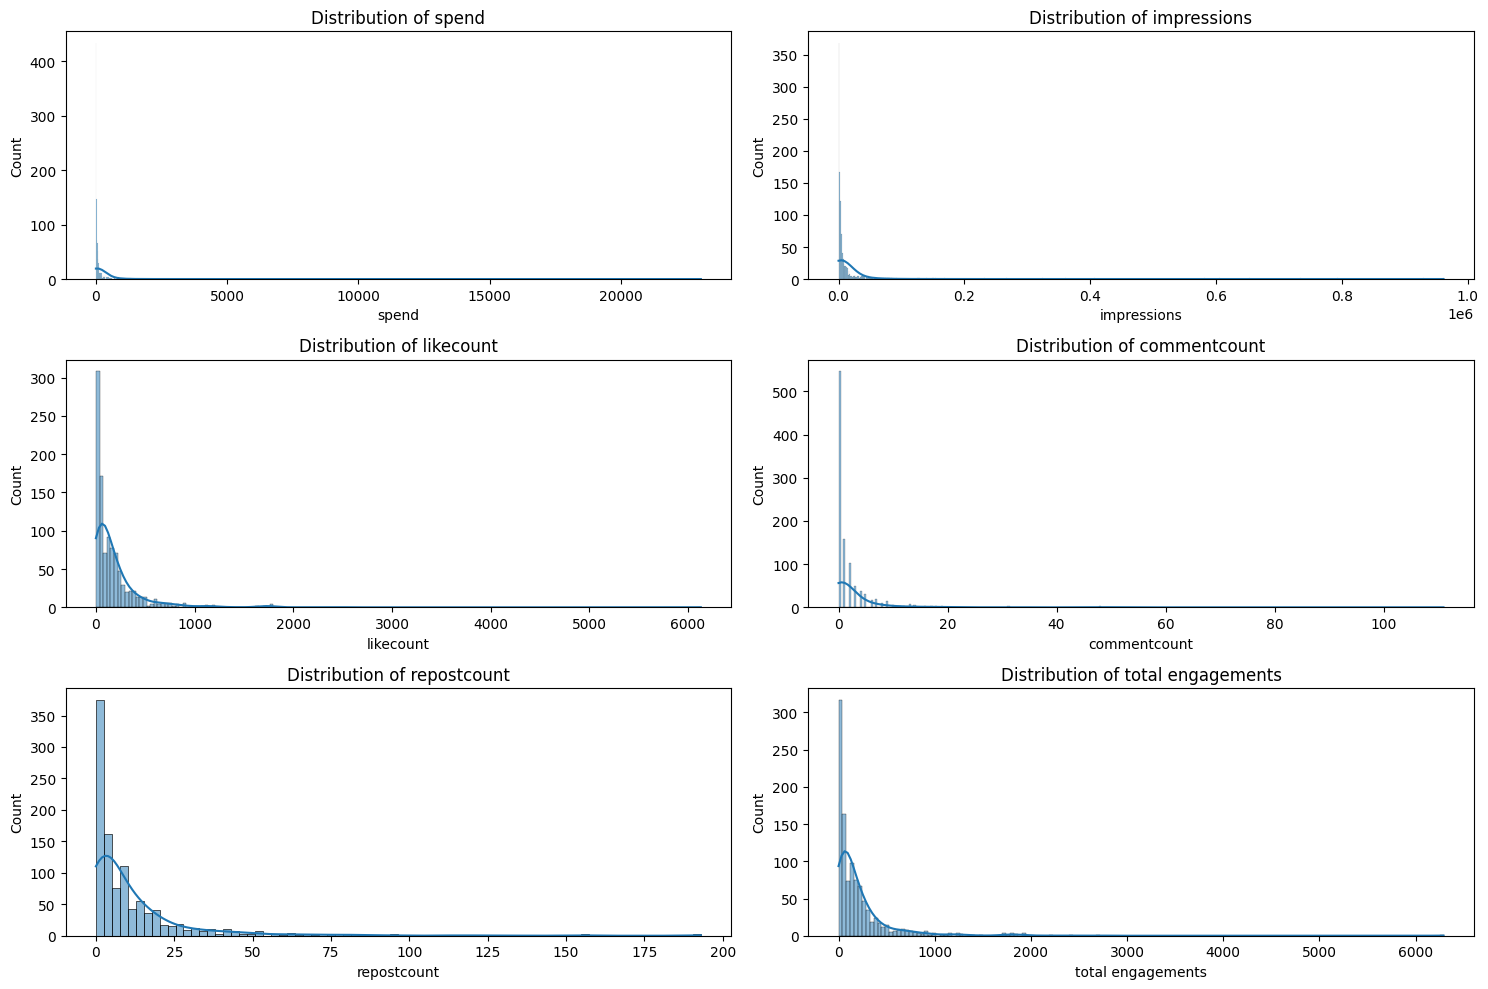

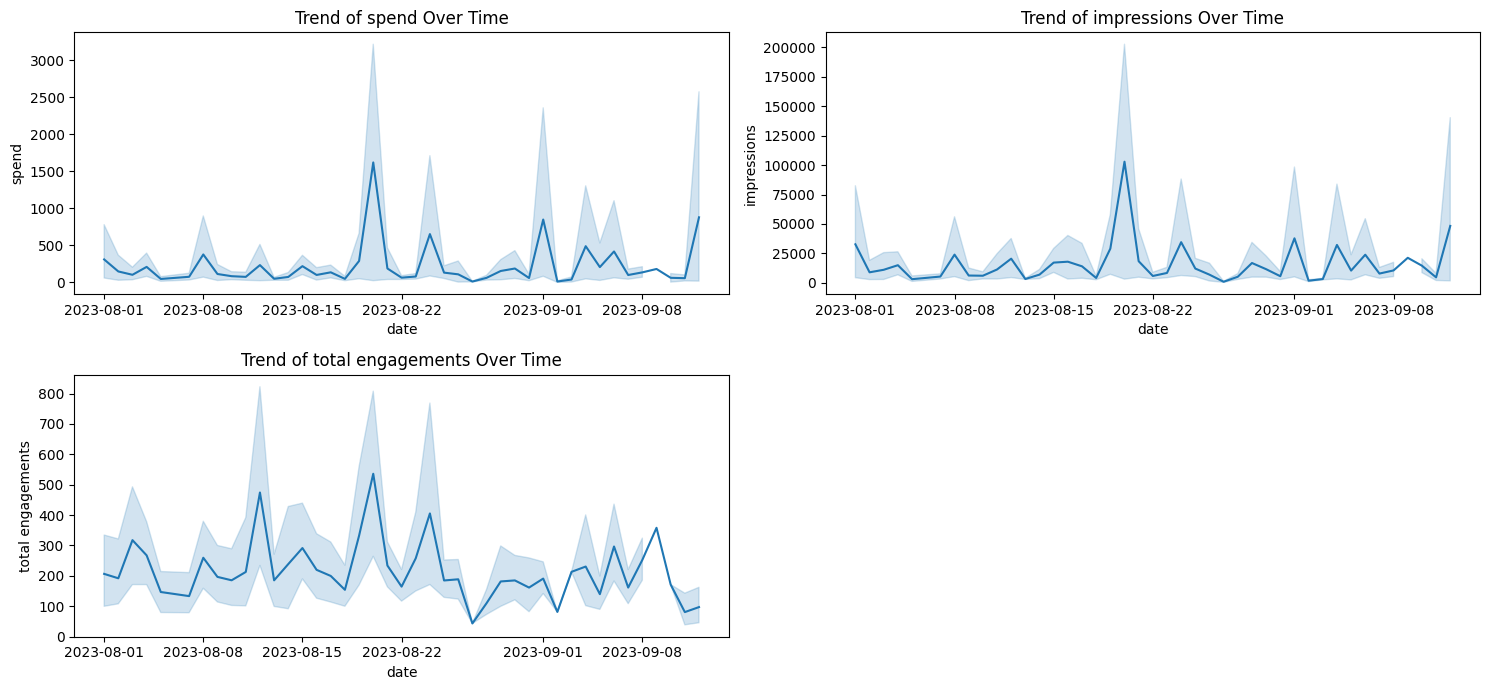

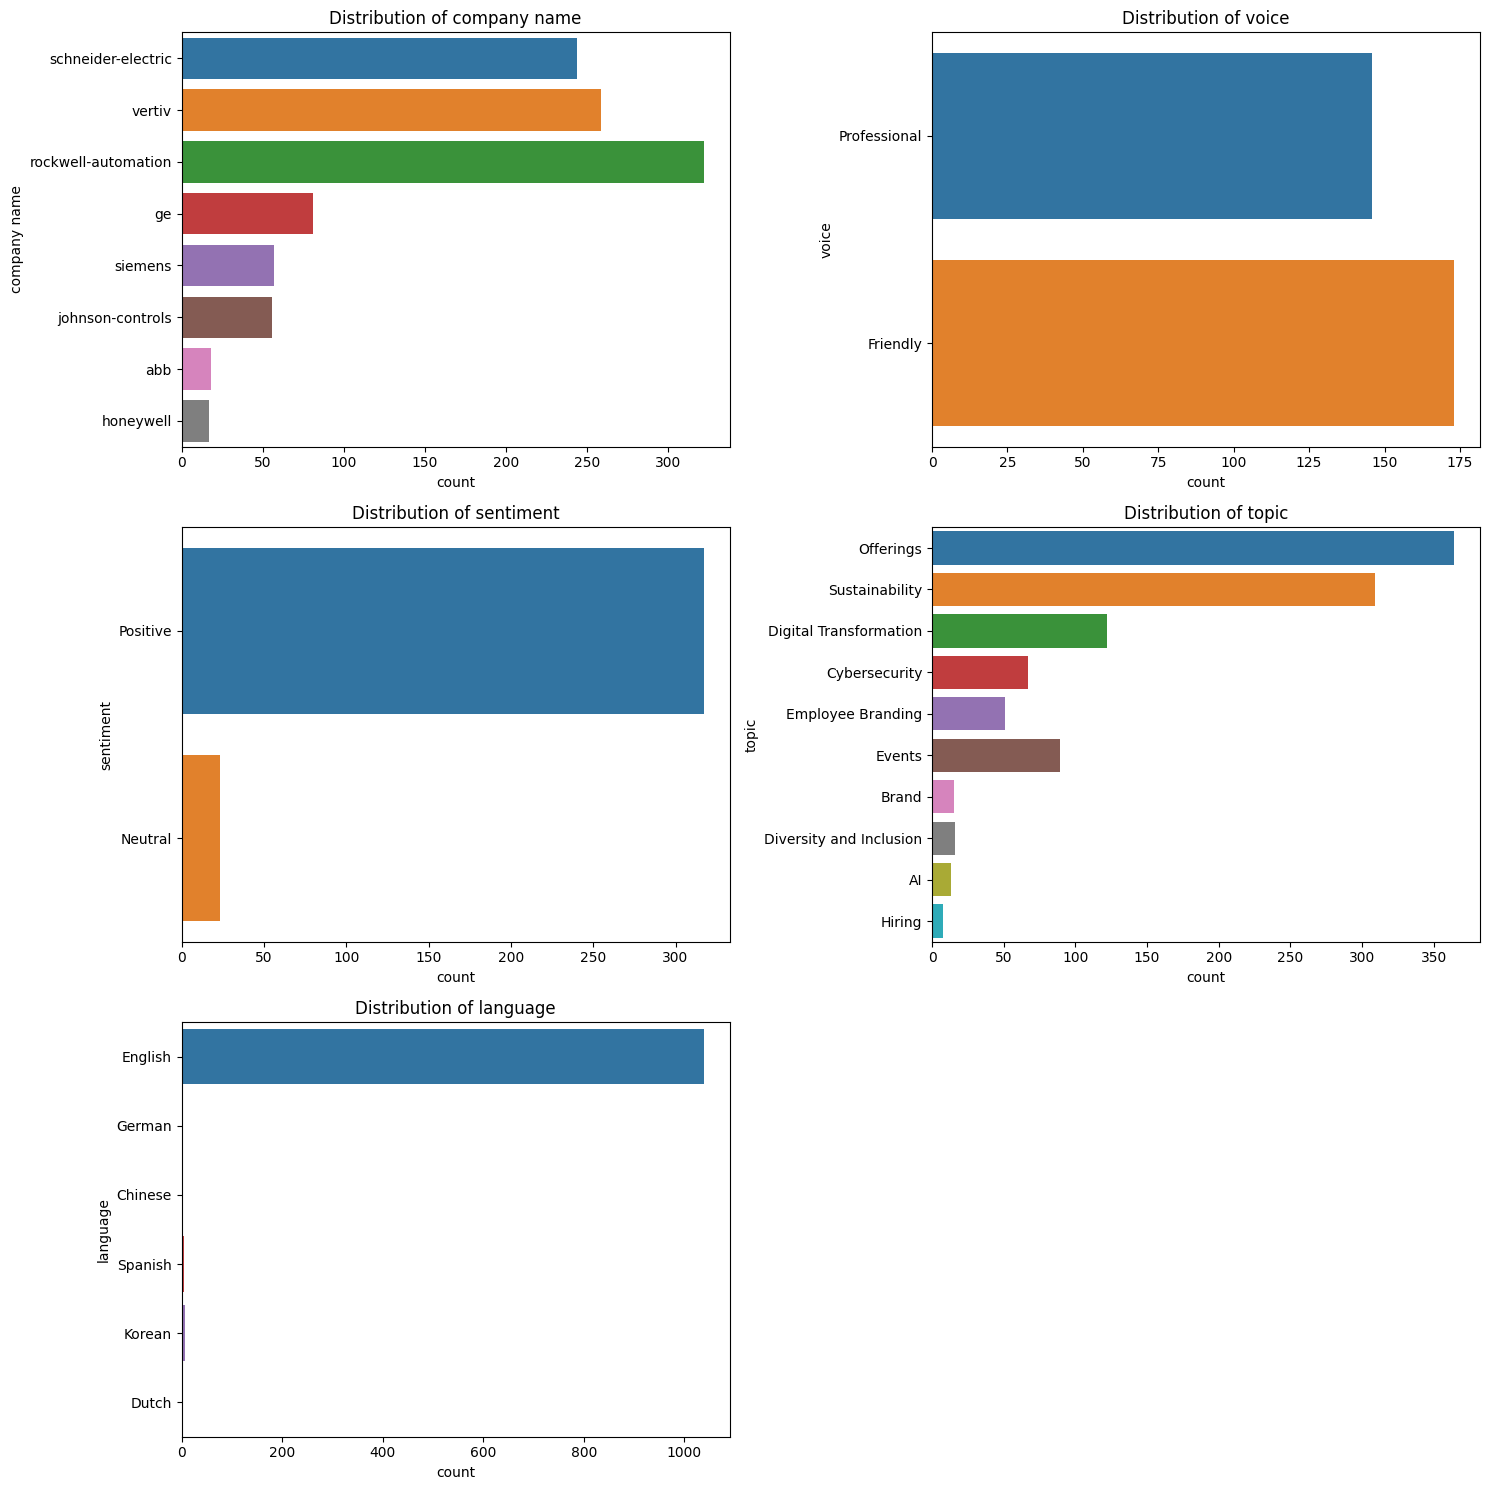

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
count,1054,1054,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054,...,319,340,1054.000000,1054,1054,1054,1054,1054,1054,608
unique,42,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,2,2,NaN,4,10,6,4,4,4,4
top,2023-09-06 00:00:00,rockwell-automation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post,...,Friendly,Positive,NaN,> 40%,Offerings,English,0,0,0,> 60
freq,48,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048,...,173,317,NaN,880,364,1038,760,732,525,402
first,2023-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,213.192998,15075.879507,197.481973,2.911765,11.707780,212.101518,34.914611,NaN,...,NaN,NaN,7.204507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1253.414372,67763.338279,343.418407,8.764124,19.993921,360.599591,61.291577,NaN,...,NaN,NaN,19.542672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,6.615000,803.750000,33.000000,0.000000,1.000000,34.250000,5.000000,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime format for trend analysis
data['date'] = pd.to_datetime(data['date'])

# Summary Statistics
summary_stats = data.describe(include='all')

# Analyze Data Distribution for key numerical columns
numerical_columns = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

# Trend Analysis for key metrics over time
trend_analysis_columns = ['spend', 'impressions', 'total engagements']
plt.figure(figsize=(15, 7))
for i, column in enumerate(trend_analysis_columns):
    plt.subplot(2, 2, i + 1)
    sns.lineplot(x='date', y=column, data=data)
    plt.title(f'Trend of {column} Over Time')
plt.tight_layout()

# Categorical Data Analysis
categorical_columns = ['company name', 'voice', 'sentiment', 'topic', 'language']
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_columns):
    if data[column].nunique() < 20:  # Only plot if there are less than 20 unique values
        plt.subplot(3, 2, i + 1)
        sns.countplot(y=column, data=data)
        plt.title(f'Distribution of {column}')
plt.tight_layout()

plt.show()

# Returning summary statistics as well
summary_stats

Correlation Matrix

---



<ipython-input-63-f52da36080e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = performance_metrics_df.corr()


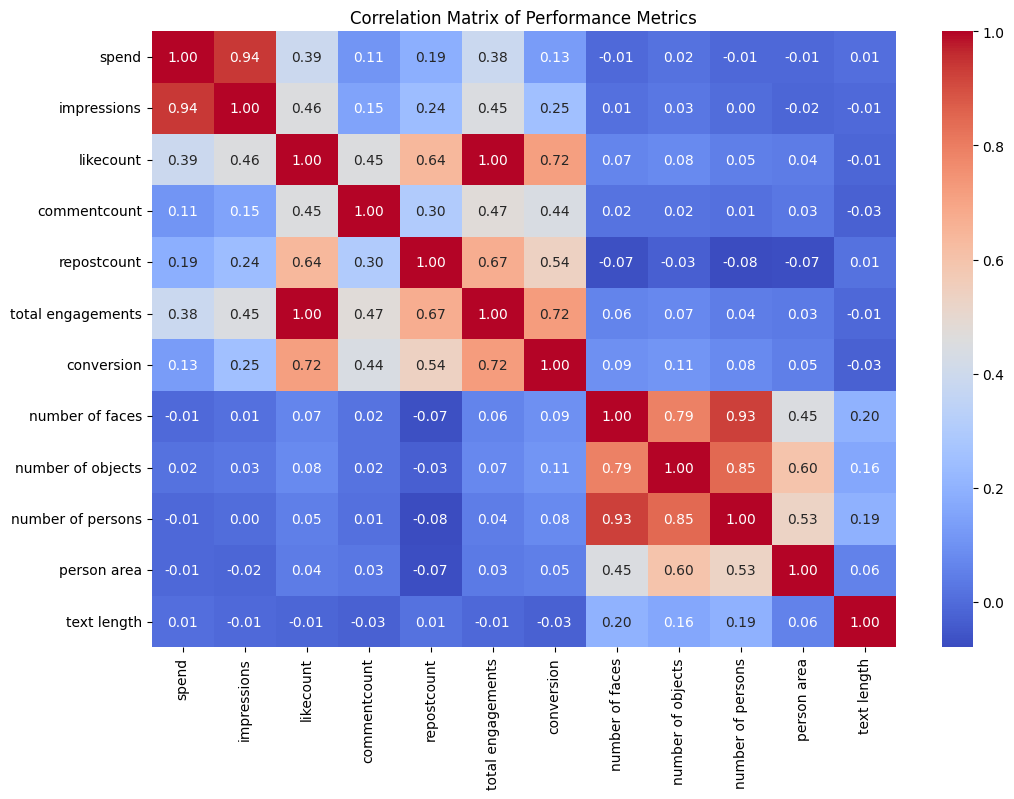

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

In [ ]:
correlation_matrix = performance_metrics_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Performance Metrics")
plt.show()
print(data.isnull().sum())

In [ ]:
# Drop columns with excessive missing values
drop_threshold = 0.6  # Threshold for dropping columns
columns_to_drop = data.columns[data.isnull().mean() > drop_threshold]
data = data.drop(columns=columns_to_drop)

# Impute missing values for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Impute missing values for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

print(data.columns)
print(data.isnull().sum())

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'created_at',
       'size', 'url', 'number of faces', 'face emotion',
       'face area percentage %', 'objects', 'number of objects',
       'primary object', 'primary object position',
       'primary object area percentage %',
       'secondary object area percentage %', 'text', 'text length',
       'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 area percentage %', 'logo 2 name', 'logo 2 area percentage %',
       'number of persons', 'person area %', 'person area', 'style', 'tone',
       'voice', 'sentiment', 'text area %', 'empty space %', 'topic',
       'language', '# faces', '# persons', '# objects', '# text length'],
      dtype='object')
date                                  0
company name                          0
spend                                

Feature Scaling - Uses LabelEncoder,StandardScaler,MinMaxScaler

---



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Update column lists
label_encode_columns = ['company name', 'type', 'dominant colour','face emotion', 'cta', 'logos', 'logo 1 name',
                        'logo 2 name', 'style', 'tone', 'voice', 'sentiment', 'topic', 'language', 'action',
                        'person area %', 'text area %', 'empty space %', '# faces', '# persons', '# objects', '# text length']
standard_scale_columns = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements',
                          'conversion', 'text length', 'number of faces', 'number of objects', 'number of persons',
                          'person area']
min_max_scale_columns = ['face area percentage %', 'primary object area percentage %',
                         'secondary object area percentage %', 'logo 1 area percentage %',
                         'logo 2 area percentage %']


# Initialize encoders and scalers
label_encoders = {}
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Apply label encoding to categorical columns
for col in label_encode_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Apply standard scaling to numerical columns
data[standard_scale_columns] = standard_scaler.fit_transform(data[standard_scale_columns])

# Apply min-max scaling to numerical columns
data[min_max_scale_columns] = min_max_scaler.fit_transform(data[min_max_scale_columns])
data


,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,2023-09-05,5,-0.165501,-0.215512,-0.485009,-0.332395,-0.485767,-0.496913,-0.455656,1,...,1,1,0,3,8,2,0,0,0,4
1,2023-09-01,5,-0.168734,-0.165299,0.077254,-0.218239,-0.135494,0.060757,-0.569918,1,...,2,2,34,3,8,2,0,0,1,1
2,2023-09-04,5,-0.168319,-0.210994,-0.415090,-0.218239,0.214778,-0.388708,-0.390363,1,...,1,1,0,3,9,2,0,0,0,4
3,2023-09-04,5,-0.167026,-0.212869,-0.418003,-0.218239,-0.335650,-0.422002,-0.439333,1,...,2,2,0,3,9,2,0,0,0,4
4,2023-09-04,5,-0.167066,-0.184669,-0.085889,-0.218239,-0.335650,-0.105712,-0.161838,1,...,2,2,21,0,9,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2023-08-04,4,-0.169460,-0.214670,-0.476269,-0.218239,-0.535806,-0.488589,-0.553595,1,...,2,2,0,3,8,2,0,0,0,4
1050,2023-08-08,4,-0.168670,-0.220310,-0.540361,-0.332395,-0.585845,-0.555177,-0.520949,1,...,2,2,23,3,8,4,0,0,2,0
1051,2023-08-04,4,0.399129,0.687100,1.236741,-0.104083,3.417271,1.364760,1.144018,1,...,2,2,0,3,8,2,0,0,0,4
1052,2023-08-08,4,-0.157870,-0.207820,-0.482096,-0.332395,-0.535806,-0.496913,-0.537272,1,...,2,1,0,3,9,2,2,2,3,4


Model Building - RandomForestRegressor

"Spend" as a Target Feature

---


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

numerical_columns = ['impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements']
X = performance_metrics_df[numerical_columns]
y = performance_metrics_df['spend']  # Assuming 'spend' is the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=150, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MSE : ",mse)
print("RMSE : ",rmse)



MSE :  14373.976277246726
RMSE :  119.89151878780552


Recommendation and Insights

---



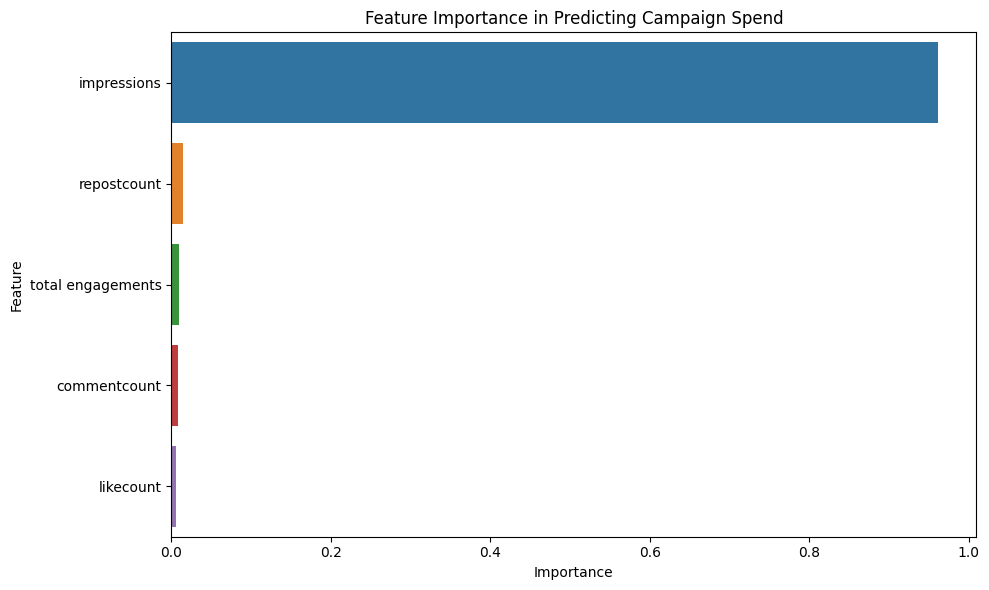

(['impressions',
  'repostcount',
  'total engagements',
  'commentcount',
  'likecount'],
              feature  importance
 0        impressions    0.961666
 3        repostcount    0.014464
 4  total engagements    0.009446
 2       commentcount    0.007971
 1          likecount    0.006452)

In [ ]:
feature_importance = model.feature_importances_
# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})

# Sorting the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Campaign Spend')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Top features based on importance
top_features = feature_importance_df.head(5)
top_features_list = top_features['feature'].tolist()

top_features_list, top_features

**Focus on Increasing Impression**s: The 'impressions' feature has the highest importance. This implies that the visibility of the campaign plays a crucial role in its performance. We should strategies to increase impressions which might include optimizing ad placement, targeting, and timing.

**Language**: English Language has more Impressions.